In [2]:
%pip install -U duckduckgo_search

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 43.3 MB/s eta 0:00:00


In [5]:
from fastai.vision.all import *
from duckduckgo_search import DDGS
from fastcore.all import *
import gradio as gr

In [6]:
def search_images(term, max_images=50):
    print(f"Searching for '{term}'")
    with DDGS() as ddgs:
        return L(ddgs.images(term, max_results=max_images)).itemgot('image')

In [7]:
searches = 'German Shepherd', 'Golden Retriever', 'Siamese Cat', 'Persian Cat'
path = Path('pets')


In [8]:
for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    resize_images(path/o, max_size=400, dest=path/o)


Searching for 'German Shepherd photo'


/tmp/ipython-input-2078519203.py:3: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e366f85bbd0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e3582b4af20>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e366f85bbd0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e3582b4af20>
  self.pid = os.fork()


Searching for 'Golden Retriever photo'


/tmp/ipython-input-2078519203.py:3: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e366f85bbd0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e3582b4af20>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e366f85bbd0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e3582b4af20>
  self.pid = os.fork()


Searching for 'Siamese Cat photo'


/tmp/ipython-input-2078519203.py:3: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e366f85bbd0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e3582b4af20>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e366f85bbd0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e3582b4af20>
  self.pid = os.fork()


Searching for 'Persian Cat photo'


/tmp/ipython-input-2078519203.py:3: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e366f85bbd0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e3582b4af20>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e366f85bbd0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e3582b4af20>
  self.pid = os.fork()


In [9]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e366f85bbd0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e3582b4af20>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e366f85bbd0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e3582b4af20>
  self.pid = os.fork()


1

In [10]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

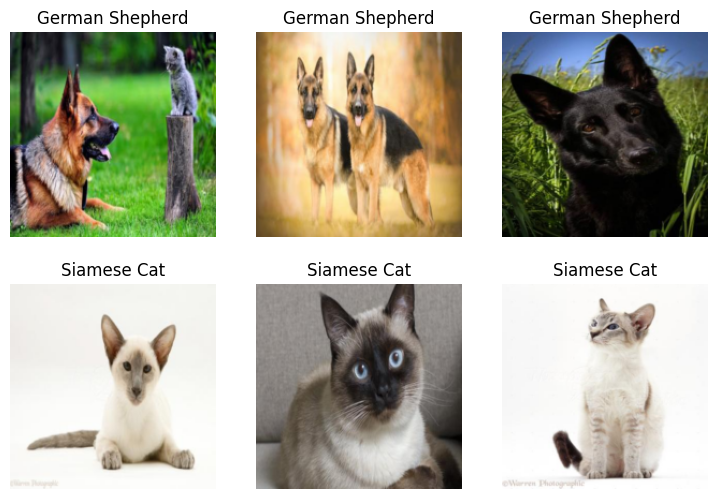

In [11]:
dls.show_batch(max_n=6)

In [12]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 136MB/s]


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e366f85bbd0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e3582b4af20>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e366f85bbd0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e3582b4af20>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e366f85bbd0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e3582b4af20>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.So

/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e366f85bbd0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e3582b4af20>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e366f85bbd0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e3582b4af20>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e366f85bbd0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e3582b4af20>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.So

In [15]:
from fastai.vision.widgets import ImageClassifierCleaner

In [16]:
cleaner = ImageClassifierCleaner(learn)
cleaner


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e366f85bbd0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e3582b4af20>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e366f85bbd0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e3582b4af20>
  self.pid = os.fork()


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e366f85bbd0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e3582b4af20>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e366f85bbd0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e3582b4af20>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e366f85bbd0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e3582b4af20>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.So

/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e366f85bbd0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e3582b4af20>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e366f85bbd0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e3582b4af20>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e366f85bbd0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e3582b4af20>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.So

In [17]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)


In [18]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

In [19]:
learn_clean = vision_learner(dls, resnet34, metrics=error_rate)
learn_clean.fine_tune(3)

/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e366f85bbd0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e3582b4af20>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e366f85bbd0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e3582b4af20>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e366f85bbd0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e3582b4af20>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.So

/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e366f85bbd0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e3582b4af20>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e366f85bbd0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e3582b4af20>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e366f85bbd0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e3582b4af20>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.So

/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e366f85bbd0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e3582b4af20>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e366f85bbd0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e3582b4af20>
  self.pid = os.fork()


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e366f85bbd0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e3582b4af20>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e366f85bbd0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e3582b4af20>
  self.pid = os.fork()


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e366f85bbd0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e3582b4af20>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e366f85bbd0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e3582b4af20>
  self.pid = os.fork()


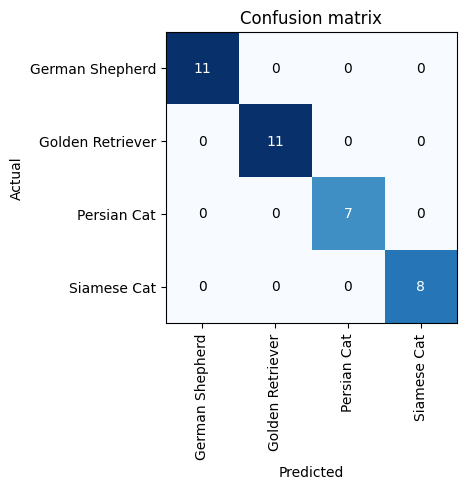

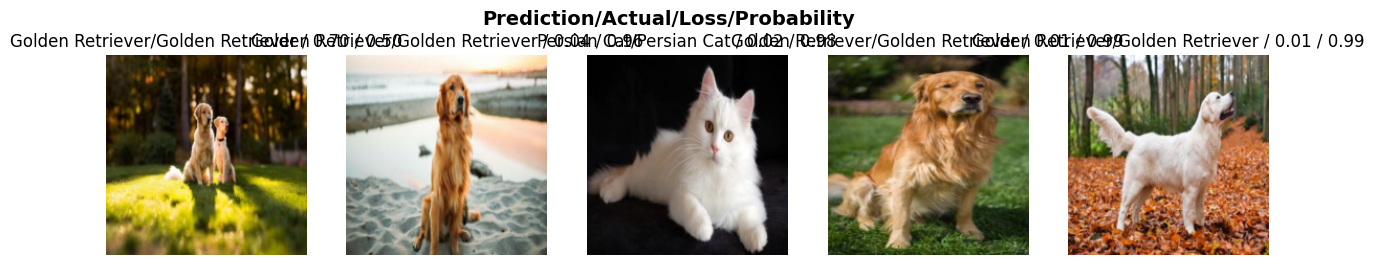

In [20]:
interp = ClassificationInterpretation.from_learner(learn_clean)
interp.plot_confusion_matrix()
interp.plot_top_losses(5, nrows=1)

In [21]:
learn_clean.export('pet_model.pkl')

#  Create and Launch the Gradio App
# Load the exported model

In [22]:
learn_inf = load_learner('pet_model.pkl')


/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [23]:
labels = learn_inf.dls.vocab

In [24]:
def predict(img):
    """Prediction function for Gradio"""
    # Convert the NumPy array from Gradio into a PIL Image
    img = Image.fromarray(img)

    # Now predict using the PIL Image
    pred, pred_idx, probs = learn_inf.predict(img)

    return {labels[i]: float(probs[i]) for i in range(len(labels))}

In [26]:

iface = gr.Interface(
    fn=predict,

    inputs=gr.Image(height=512, width=512),
    outputs=gr.Label(num_top_classes=4),
    title="Pet Breed Classifier",
    description="Upload a photo of a German Shepherd, Golden Retriever, Siamese Cat, or Persian Cat to see the model's prediction!"
)

In [27]:
iface.launch(share=True)

/usr/local/lib/python3.11/dist-packages/uvicorn/protocols/websockets/websockets_impl.py:17: DeprecationWarning: websockets.server.WebSocketServerProtocol is deprecated
  from websockets.server import WebSocketServerProtocol


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1ed692ae2a3b45e2df.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
